In [1]:
import sys

sys.path.insert(0, "../simulation")
sys.path.insert(0, "../methods")

import numpy as np
from ReconstructionErrorClass import RE
from AnalyticalMappingEntropyClass import AME
from SimulationClass import Simulation
from TicaTimescalesClass import TICA
#from _methods_utils import _mapping_combinations
import networkx as nx
import matplotlib.pyplot as plt
plt.rcParams['font.size'] = 15

%matplotlib inline

In [2]:
traj = np.load('./model_protein_coords.npy')
print(traj.shape)

(9900, 13, 3)


In [3]:
RE_model = RE(traj=traj, device='cuda')

In [4]:
RE_model.train_RE(batch_size=128,
                  lr_non_linear=3e-4,
                  max_epoch=301,
                  epoch_nonlinear=150,
                  loss_print=False) # it will take a while

(array([10., 10.,  7.,  9.,  6.,  8.,  7.,  7.,  3.,  0.,  5.,  4.,  1.,
         0.,  0.,  0.,  0.,  0.,  0.,  1.]),
 array([0.21511312, 0.22732144, 0.23952976, 0.25173807, 0.26394639,
        0.27615471, 0.28836302, 0.30057134, 0.31277966, 0.32498798,
        0.33719629, 0.34940461, 0.36161293, 0.37382124, 0.38602956,
        0.39823788, 0.41044619, 0.42265451, 0.43486283, 0.44707114,
        0.45927946]),
 <BarContainer object of 20 artists>)

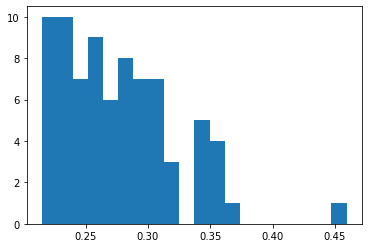

In [5]:
loss_tests = []
for key in RE_model.loss_tests.keys():
    loss_tests.append(np.mean(RE_model.loss_tests[key][-5::]))
    
plt.hist(loss_tests, bins=20)